### Support Vector Machines (Supervised)

SVM can be used for both classification or regression challenges. However, it is mostly used in classification problems.

hyper parameters

- **gamma**: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. The higher the value of gamma, the more exact the algorithm tries to fit the training data set i.e. generalization error and cause over-fitting problem.

- **C**: Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and classifying the training points correctly.

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [127]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys
sys.path.insert(0, 'helper_functions/')
from utilities import remove_borders
from ml_visuals import plot_decision_boundaries
# use seaborn plotting defaults
import seaborn as sns

In the plot below, we see many different ways of separating the groups that discriminate well between the samples. A new data point ("X") will be assigned a label. The intuition of svms is that rather than simply drawing a zero-width line between classes, we can draw around each line a margin of some width, up to the nearest point.  

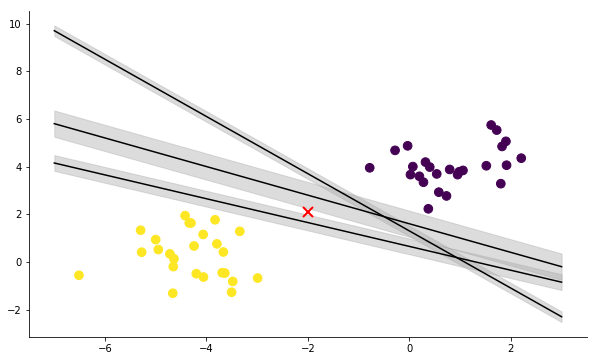

In [89]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, n_features=2, centers=2, random_state=3,
                 cluster_std=.8)

fig, ax = plt.subplots(figsize=[10,6])

xfit = np.linspace(-7, 3)
ax.scatter(X[:,0], X[:,1], c=y, s=75)
ax.plot([-2], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

# draw straight lines
for i, j in [(-.5, .65), (-.6, 1.6), (-1.2, 1.3)]:
    ax.plot(xfit, i * xfit + j, color = 'black')
    
# draw straight lines +  margins
for i, j, m in [(-.5, .65, .33), (-.6, 1.6, .55), (-1.2, 1.3, .22)]:
    yfit = i * xfit + j
    ax.fill_between(xfit, yfit - m, yfit + m, edgecolor='none',
                     color='darkgrey', alpha=0.4)
remove_borders(ax)

In [53]:
from sklearn.svm import SVC # "Support vector classifier"
svc = SVC(kernel='linear', C=1E10)
svc.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
svc.support_vectors_

array([[ 0.37294518,  2.22768991],
       [-0.78264816,  3.94874696],
       [-3.34338721,  1.28354236]])

In [121]:
def plot_svc_decision_function(model, plot_support=True):
    """
    Plot SVC decision function
    """
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # decision_function --> distances of samples X to separating hyperplane
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors=['darkgray', 'black', 'darkgray'],
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1], edgecolors='red',
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

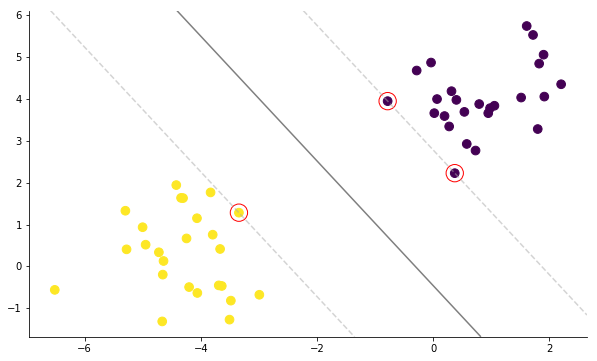

In [122]:
fig, ax = plt.subplots(figsize=[10,6])
ax.scatter(X[:,0], X[:,1], c=y, s=75)
plot_svc_decision_function(model = svc, plot_support=True)
remove_borders(ax)

A key element of SVC is for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! 

Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin. We could plot an SVC learned from 60, 100 or 200 points but the support vectors will remain as such.

This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

### Solving non-linear classification problems. The Kernel trick

Let's create some noise in the data and see the power of the kernel trick.

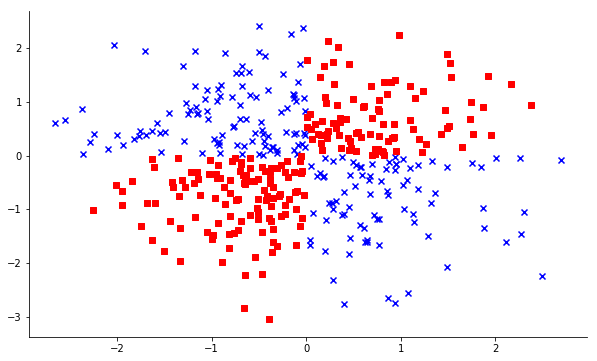

In [126]:
np.random.seed(0)
X_xor = np.random.randn(400, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

fig, ax = plt.subplots(figsize=[10,6])

ax.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
ax.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')
remove_borders(ax)

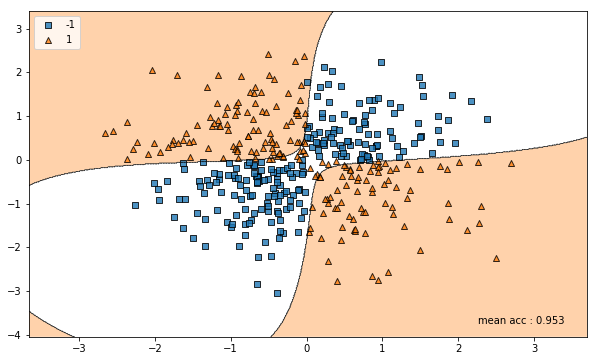

In [130]:
# let's replace the parameter kernel with 'rbf' (Radial basis function)
svm = SVC(kernel='rbf', random_state=0, gamma=.2, C=10) 
# y parameter gamma: cut-off parameter for the Gaussian sphere. If we increase the y-value, we increase the influence
# of the training samples, leading to softer decision boundaries.
svm.fit(X_xor, y_xor)

fig, ax = plt.subplots(figsize=[10,6])
plot_decision_boundaries(X_xor, y_xor, classifier=svm)
ax.legend(loc = 'upper left')

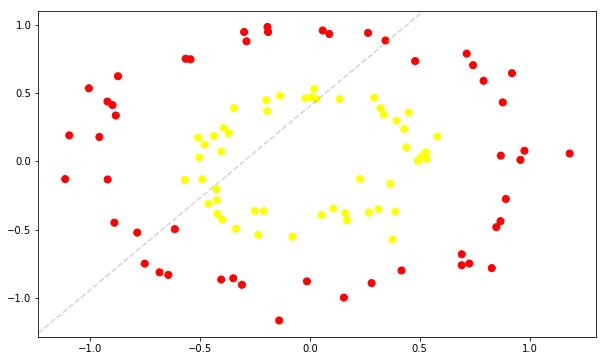

In [148]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.5, noise=.08)

clf = SVC(kernel='linear').fit(X, y)
fig, ax = plt.subplots(figsize=[10,6])
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [149]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

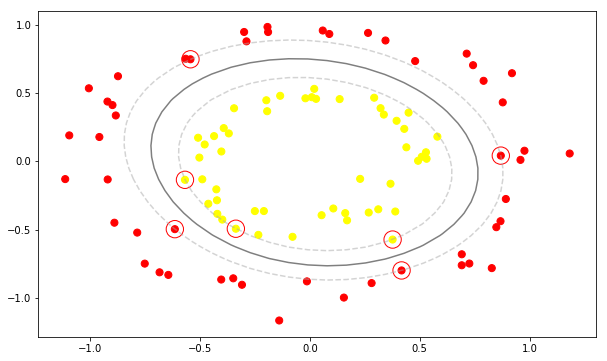

In [154]:
fig, ax = plt.subplots(figsize=[10,6])
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');